In [ ]:
# Import relevant libraries needed for splitting the data for machine learning
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

import sklearn.model_selection as skl

## 1. Read the Data
First read in the dataframe. You'll notice it's similar to the dataframe that you ended the final solution with in Lesson 2, Exercise 4, only with more data:

In [ ]:
# Read the Data
d = pd.read_csv('findings_data_5000.csv')


,Unnamed: 0,Finding Labels,Patient ID,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,1,Cardiomegaly|Emphysema,1,57,M,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,No Finding,2,77,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,Atelectasis,3,79,M,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Cardiomegaly|Edema|Effusion,4,55,F,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Consolidation|Mass,5,68,M,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 2. Understand the Distribution
Just like in Lesson 2, Exercise 4, we want to see how different diseases are distributed with our disease of interest, as well as how age and gender are distributed:

In [ ]:
# Extract all unique disease labels from the 'Finding Labels' column
# The code splits each entry in 'Finding Labels' by '|', flattens the resulting lists,
# finds all unique labels, and filters out any empty strings.

all_labels = np.unique(list(chain(*d['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]

[Text(0, 0.5, 'Number of Images with Label')]

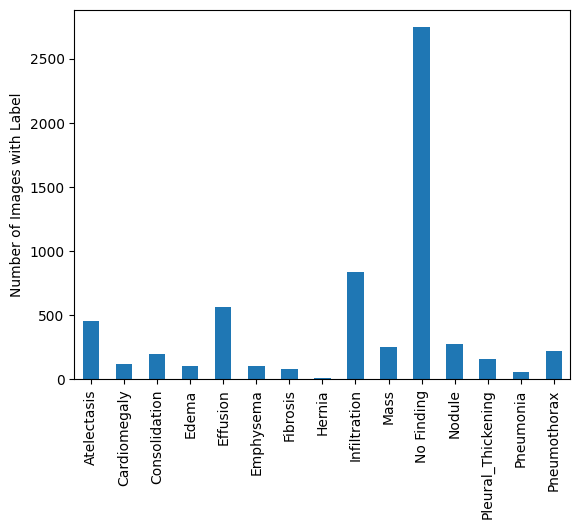

In [17]:
# Plot the number of images for each disease label

# This code sums each disease label column in the dataframe `d` to count how many images have each label.
# The `.plot(kind='bar')` function creates a bar plot of these counts.
# The `ax.set(ylabel = 'Number of Images with Label')` sets the y-axis label for clarity.

ax = d[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

**Since there are many combinations of potential findings, let's look at the 30 most common co-occurrences:**

<Axes: xlabel='Finding Labels'>

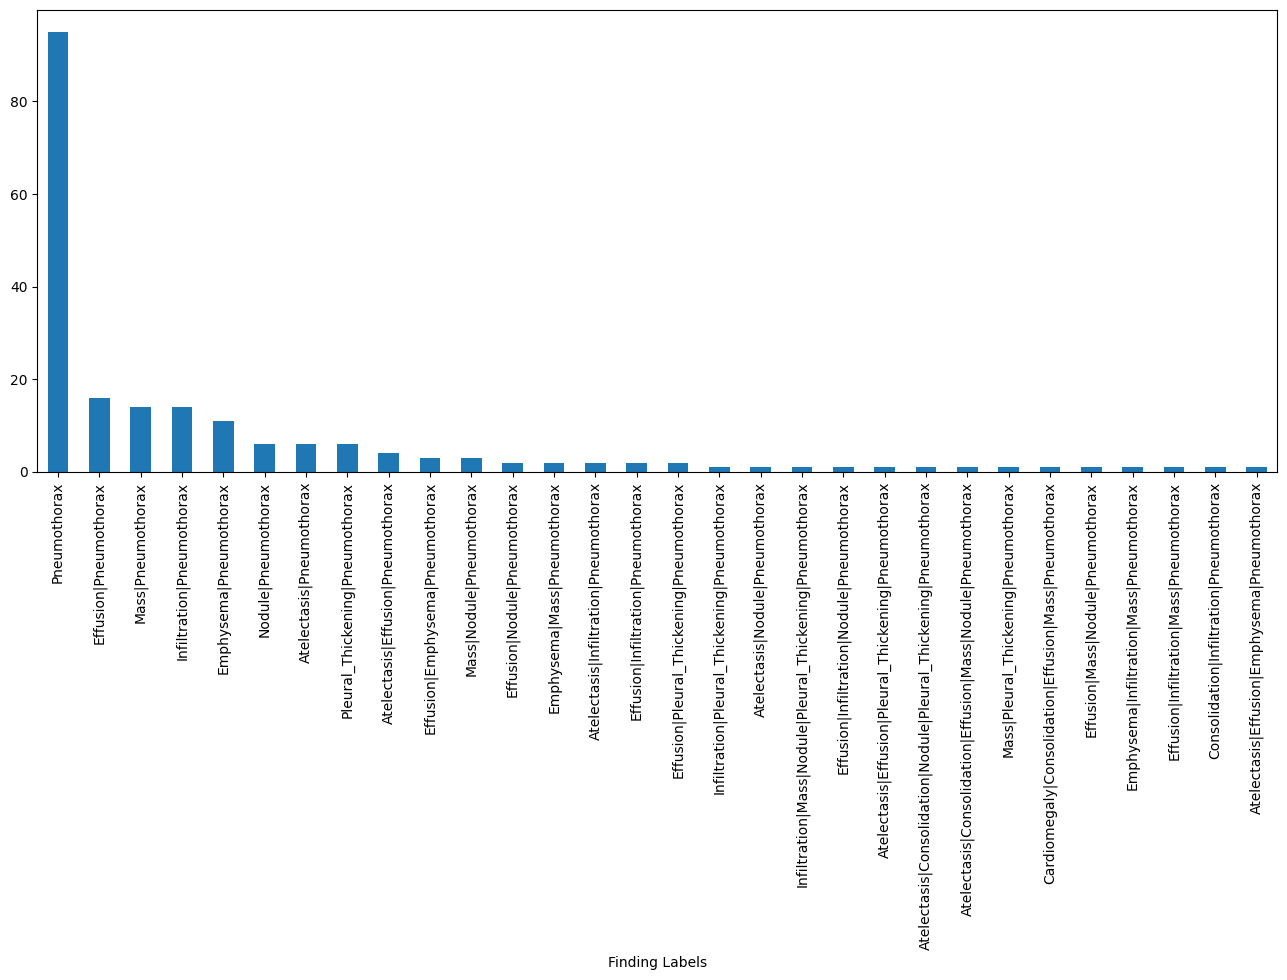

In [ ]:
# Plotting the 30 Most Common Co-occurring Findings with Pneumothorax
# 
# plt.figure(figsize=(16,6)) - Creates a new figure with a specified size for better readability.
# d[d.Pneumothorax==1] - Filters the dataframe to only include rows where Pneumothorax is present.
# ['Finding Labels'] - Selects the 'Finding Labels' column from the filtered dataframe.
# .value_counts() - Counts the occurrences of each unique combination of findings.
# [0:30] - Selects the top 30 most common combinations.
# .plot(kind='bar') - Plots these counts as a bar chart.

plt.figure(figsize=(16,6))
d[d.Pneumothorax==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

<Axes: xlabel='Patient Gender'>

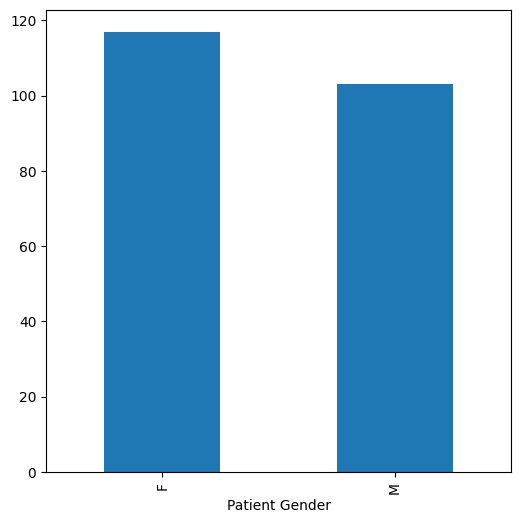

In [ ]:
# Plotting Gender Distribution for Pneumothorax Cases

# plt.figure(figsize=(6,6)) - Creates a new figure with a specified size for the plot.
# d[d.Pneumothorax == 1] - Filters the dataframe to include only rows where Pneumothorax is present.
# ['Patient Gender'] - Selects the 'Patient Gender' column from the filtered dataframe.
# .value_counts() - Counts the occurrences of each gender in the filtered data.
# .plot(kind='bar') - Plots the gender counts as a bar chart.

plt.figure(figsize=(6,6))
d[d.Pneumothorax ==1]['Patient Gender'].value_counts().plot(kind='bar')

(array([12., 18., 13., 21., 20., 47., 50., 26.,  9.,  4.]),
 array([ 7. , 14.6, 22.2, 29.8, 37.4, 45. , 52.6, 60.2, 67.8, 75.4, 83. ]),
 <BarContainer object of 10 artists>)

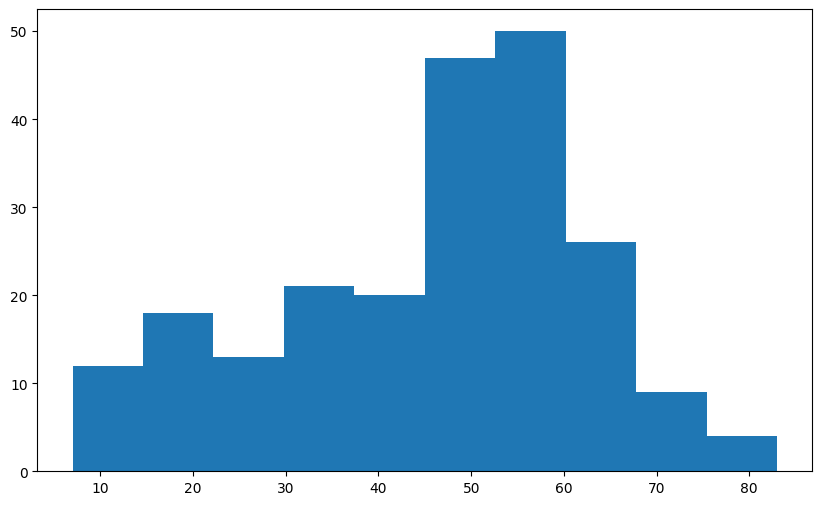

In [18]:
# Plotting the Age Distribution for Pneumothorax Cases

# plt.figure(figsize=(10,6)) - Creates a new figure with a specified size for better visualization.
# d[d.Pneumothorax==1] - Filters the dataframe to include only rows where Pneumothorax is present.
# ['Patient Age'] - Selects the 'Patient Age' column from the filtered dataframe.
# plt.hist(...) - Plots a histogram of the ages of patients with Pneumothorax.

plt.figure(figsize=(10,6))
plt.hist(d[d.Pneumothorax==1]['Patient Age'])

## 3. Split the Data into Train/Test Partitions
Now, knowing what we know from above, let's create the appropriate training and validation sets for a model that we want to train to classify the presence of a Pneumothorax

In [19]:
# ## Splitting the Dataset into Training and Validation Sets using scikit-learn
# 
# This block uses the `train_test_split` function from the `scikit-learn` (imported as `skl`) library to divide the dataset into training and validation sets.
# - **scikit-learn** is a popular Python library for machine learning that provides simple and efficient tools for data analysis and modeling.
# - `train_test_split` splits arrays or dataframes into random train and test subsets.
# - The `test_size=0.2` argument specifies that 20% of the data will be used for validation, and 80% for training.
# - The `stratify=d['Pneumothorax']` argument ensures that the proportion of Pneumothorax cases is preserved in both the training and validation sets, which is important for imbalanced datasets.
# - The function returns two new dataframes: `train_df` (training set) and `valid_df` (validation set).

train_df, valid_df = skl.train_test_split(d, 
                                   test_size = 0.2, 
                                   stratify = d['Pneumothorax'])

In [ ]:
# ## Checking the Proportion of Pneumothorax Cases in the Training Set
# 
# This block calculates the proportion of Pneumothorax cases in the training dataset (`train_df`).
# - `train_df['Pneumothorax']` accesses the column indicating presence (1) or absence (0) of Pneumothorax.
# - `.sum()` adds up all the 1's, giving the total number of positive cases.
# - `len(train_df)` returns the total number of samples in the training set.
# - Dividing the sum by the length gives the fraction of positive cases.
# This is a quick way to check class balance after any sampling or splitting steps.

train_df['Pneumothorax'].sum()/len(train_df)

np.float64(0.04401100275068767)

In [22]:
# ## Checking the Proportion of Pneumothorax Cases in the Validation Set
# 
# This block calculates the proportion of Pneumothorax cases in the validation dataset (`valid_df`).
# - `valid_df['Pneumothorax']` accesses the column indicating presence (1) or absence (0) of Pneumothorax.
# - `.sum()` adds up all the 1's, giving the total number of positive cases.
# - `len(valid_df)` returns the total number of samples in the validation set.
# - Dividing the sum by the length gives the fraction of positive cases.
# This is a quick way to check class balance after any sampling or splitting steps.

valid_df['Pneumothorax'].sum()/len(valid_df)

np.float64(0.044)

Great, our train_test_split made sure that we had the same proportions of Pneumothorax in both sets!

### Condition 1 - To have _EQUAL_ amount of positive and negative cases of Pneumothorax in Training 
But.... we know that we want our model to be trained on a set that has _equal_ proportions of pneumothorax and no pneumothorax, so we're going to have to throw away some data:

In [26]:
## Balancing the Training Set for Pneumothorax Cases using Python's random.sample

# This block uses the `sample` function from Python's built-in `random` module to randomly select a subset of negative case indices.
# - `train_df[train_df.Pneumothorax==1].index.tolist()` gets the indices of all positive (Pneumothorax) cases.
# - `train_df[train_df.Pneumothorax==0].index.tolist()` gets the indices of all negative cases.
# - `sample(np_inds, len(p_inds))` randomly selects a subset of negative indices equal in size to the number of positive cases, ensuring class balance.
# - `train_df = train_df.loc[p_inds + np_sample]` updates the training dataframe to include only the selected positive and sampled negative cases, resulting in a balanced dataset.

p_inds = train_df[train_df.Pneumothorax==1].index.tolist()
np_inds = train_df[train_df.Pneumothorax==0].index.tolist()

np_sample = sample(np_inds,len(p_inds))
train_df = train_df.loc[p_inds + np_sample]

In [ ]:
# ## Checking the Proportion of Pneumothorax Cases in the Balanced Training Set
#
# This block uses pandas, a powerful Python library for data manipulation and analysis.
# - `train_df['Pneumothorax']` selects the 'Pneumothorax' column from the balanced training dataframe.
# - `.sum()` counts the total number of positive (1) Pneumothorax cases.
# - `len(train_df)` returns the total number of samples in the training set.
# - Dividing the sum by the length gives the fraction of positive cases, confirming the dataset is balanced.

train_df['Pneumothorax'].sum()/len(train_df)

np.float64(0.5)

Ta-da! We randomly chose a set of non-Pneumothorax images using the sample() function that was the same length as the number of true Pneumothorax cases we had, and then we threw out the rest of the non-Pneumothorax cases. Now our training dataset is balanced 50-50.

### Condition 2 - To have 20% positive cases of Pneumothorax in the Test Set
Finally, we want to make the balance in our validation set more like 20-80 since our exercise told us that the prevalence of Pneumothorax in this clinical situation is about 20%:

In [ ]:
# ## Balancing the Validation Set for Pneumothorax Cases using Python's random.sample
#
# This block uses the `sample` function from Python's built-in `random` module to randomly select a subset of negative case indices.
# - `valid_df[valid_df.Pneumothorax==1].index.tolist()` gets the indices of all positive (Pneumothorax) cases.
# - `valid_df[valid_df.Pneumothorax==0].index.tolist()` gets the indices of all negative cases.
# - `sample(np_inds, 4*len(p_inds))` randomly selects a subset of negative indices equal to four times the number of positive cases, creating a 20% positive, 80% negative class balance.
# - `valid_df = valid_df.loc[p_inds + np_sample]` updates the validation dataframe to include only the selected positive and sampled negative cases, resulting in the desired class balance.
#
p_inds = valid_df[valid_df.Pneumothorax==1].index.tolist()
np_inds = valid_df[valid_df.Pneumothorax==0].index.tolist()

# The following code pulls a random sample of non-pneumonia data that's 4 times as big as the pneumonia sample.
np_sample = sample(np_inds,4*len(p_inds))
valid_df = valid_df.loc[p_inds + np_sample]

In [ ]:
## Checking the Proportion of Pneumothorax Cases in the Validation Set

# This block uses pandas, a powerful Python library for data manipulation and analysis.
# - `valid_df['Pneumothorax']` selects the 'Pneumothorax' column from the validation dataframe.
# - `.sum()` counts the total number of positive (1) Pneumothorax cases.
# - `len(valid_df)` returns the total number of samples in the validation set.
# - Dividing the sum by the length gives the fraction of positive cases, confirming the class balance in the validation set.

valid_df['Pneumothorax'].sum()/len(valid_df)

np.float64(0.2)

Summary: This script processes a medical imaging dataset to prepare it for machine learning classification of Pneumothorax. The dataset contains 5,000 rows (patients/images) and 20 columns, including patient demographics, disease labels, and binary indicator columns for each finding. It begins by importing necessary libraries and reading the data into a pandas DataFrame. The script then explores the distribution of disease labels, visualizing the frequency of each finding, common co-occurrences, and demographic distributions (age and gender) for Pneumothorax cases. Next, it splits the data into training and validation sets using stratified sampling to maintain the original class balance. To address class imbalance, the training set is further balanced to have equal numbers of positive and negative Pneumothorax cases by random undersampling of the majority class, while the validation set is adjusted to reflect a clinically realistic 20% prevalence of Pneumothorax. Throughout, proportions of positive cases are checked to ensure the desired class distributions, resulting in datasets suitable for robust and clinically relevant model training and evaluation.